# Deep Learning

## Definitions

## Linear Units
Neural network cosisted of individual neuron works together, and here is a diagram of a single neuron with one input:

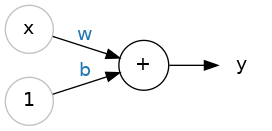

The input is x, its connection to the neuron has a weight which is w. Whenever a value flows through a connection, we multiply the value by the connection's weight. For the input x, what reaches the neuron is w * x. A neural network "learns" by modifying its weights.

The b is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just b (since 1 * b = b). The bias enables the neuron to modify the output independently of its inputs.

The y is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula `y = wx + b`.

NOTE: It's an equation of a line! It's the slope-intercept equation, where w is the slope and b is the y-intercept.

## The Linear Unit as a Model (single input)
Single neuron models are linear models. Imagine how this might work on a dataset like 80 Cereals. Training a model with 'sugars' (grams of sugars per serving) as input and 'calories' (calories per serving) as output, we might find the bias is b=90 and the weight is w=2.5. We could estimate the calorie content of a cereal with 5 grams of sugar per serving like this:
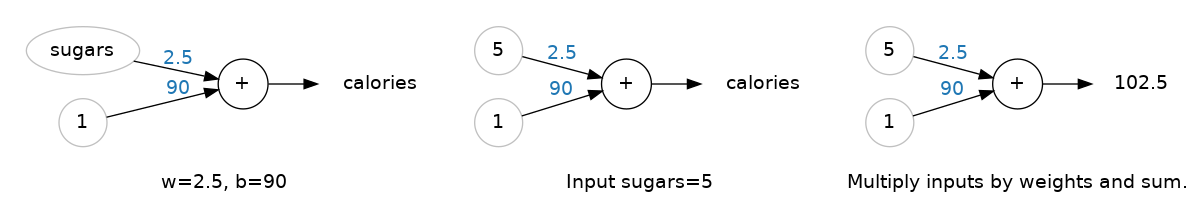

Based on the formula:
_calories_ = 2.5 x 5 + 90 = 102.5

## Multiple Inputs
The 80 Cereals dataset has many more features than just 'sugars'. What if we wanted to expand our model to include things like fiber or protein content? We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

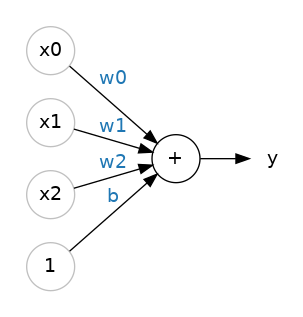

The formula for this neuron would be  `y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b`. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

## Linear Units in Keras
The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of layers. We can create models like those above using a dense layer.

We could define a linear model accepting three input features `('sugars', 'fiber', and 'protein')` and producing a single output `('calories')` like so:

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# create ntwrk with one linear unit:
model = keras.Sequential([
    keras.Input(shape=(3, )), 
    layers.Dense(units=1)
])

With the first argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

With the second argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

This model is now ready to be fit to training data!

## Exercise: Single Neuron

In [10]:
# Set up
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [12]:
import pandas as pd

df = pd.read_csv("data/red-wine.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
df.shape

(1599, 12)

## 1) Input shape

Based on the data, `quality` is the target and the remaining columns are features.

In [20]:
input_shape = 11

## 2) Define the linear model


In [21]:
model = keras.Sequential([
    keras.Input(shape=(input_shape, )),
    layers.Dense(units=1)
])

## 3) Look at the weights

Internally, Keras represents the weights of a neural network with tensors. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU) accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights are kept in its weights attribute as a list of tensors. Get the weights of the model we defined above.

In [30]:
w, b = model.weights

In [32]:
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<Variable path=sequential_2/dense_2/kernel, shape=(11, 1), dtype=float32, value=[[ 0.33292705]
 [-0.64901507]
 [ 0.22980148]
 [-0.05498123]
 [-0.34651807]
 [ 0.2743569 ]
 [-0.30525193]
 [-0.06898564]
 [ 0.36418384]
 [ 0.28741217]
 [ 0.54523045]]>

Bias
<Variable path=sequential_2/dense_2/bias, shape=(1,), dtype=float32, value=[0.]>


There are 11 value for weights, one for each feature and the value of bias is 0.0

## Plot the output of an untrained linear model
 Let's take a look at the "curve" produced by a linear model.

In [36]:
model = keras.Sequential([
    keras.Input(shape=(1, )),
    layers.Dense(units=1)
])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


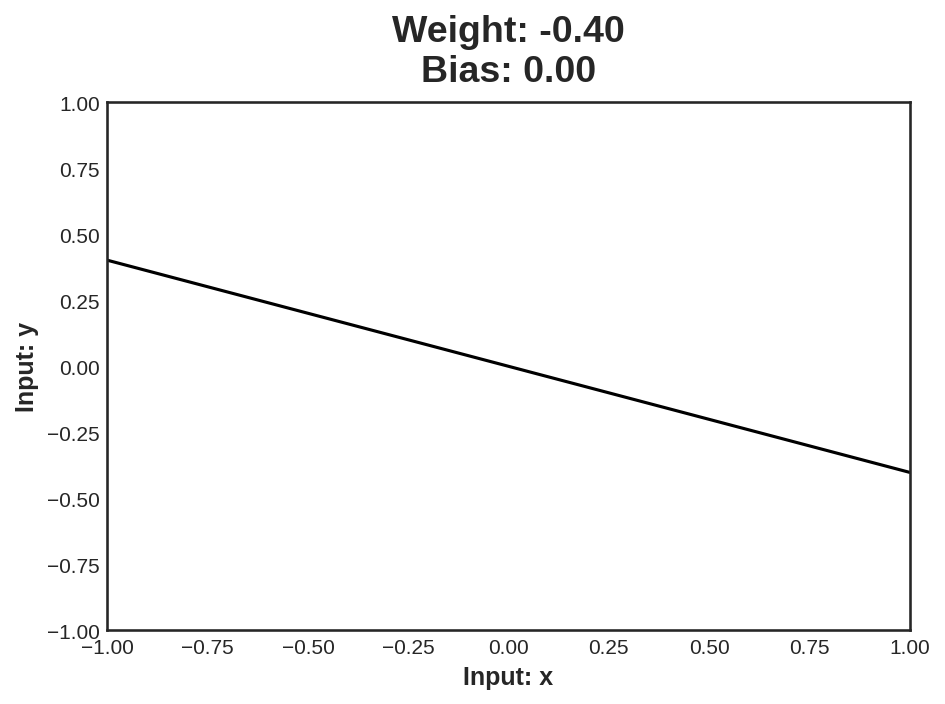

In [38]:
import tensorflow as tf
x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=150)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Input: y")
w, b = model.get_weights()
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()